In [10]:
import pandas as pd

In [11]:
pd_df = pd.read_csv("pump_telegram.csv")
pd_df



,symbol,group,date,hour,exchange
0,R,ATW,2018-01-01,16:00,yobit
1,DALC,ATW,2018-01-02,16:00,yobit
2,LRC,ATW,2018-01-03,15:59,yobit
3,SEL,ATW,2018-01-04,16:03,yobit
4,LUN,ATW,2018-01-05,16:00,yobit
...,...,...,...,...,...
1105,BRD,CCS,2020-03-24,16:00,binance
1106,NXS,CCS,2020-03-25,15:57,binance
1107,RLC,CCS,2020-04-20,16:00,binance
1108,ADX,CCS,2020-07-07,16:00,binance


In [12]:
counts = pd_df["symbol"].value_counts()
percs = pd_df["symbol"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
symbol,,
BRD,24,2.2%
RDN,24,2.2%
NXS,22,2.0%
BNT,22,2.0%
NAV,22,2.0%
...,...,...
DCRE,1,0.1%
DRACO,1,0.1%
IXT,1,0.1%


In [13]:
counts = pd_df["date"].value_counts()
percs = pd_df["date"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
date,,
2019-10-02,5,0.5%
2019-05-18,5,0.5%
2019-05-10,5,0.5%
2020-11-04,5,0.5%
2018-10-09,5,0.5%
...,...,...
2019-12-13,1,0.1%
2019-11-15,1,0.1%
2019-11-12,1,0.1%


In [14]:
groups_df = pd.read_csv("groups.csv")
groups_df

,group_name,group_code,last_time_checked,telegram_link
0,Trading Crypto Coach,TCC,2020-10-19,https://t.me/tradingcryptocoach
1,Trading Crypto Guide,TCG,2020-10-19,https://t.me/TCGFORYOU
2,BigPumpSignal,BPS,2020-10-15,https://t.me/bigpumpsignal
3,BigPumpGroup.com,BPG,2020-10-15,https://t.me/bigpumpgroup_com
4,Mega Pump Group,MPG,2020-10-15,https://t.me/mega_pump_group
5,Crypto4Pumps,C4P,2020-10-15,https://t.me/Crypto4Pumps
6,Pump King Community,PKG,2020-10-15,https://t.me/pumpingking
7,AltTheWay,ATW,2020-10-15,https://t.me/AltTheWay
8,Luxurious,LUX,2020-10-18,https://t.me/LuxuriousCrypto
9,Cryptopia pump squad,CPS,2020-10-18,https://t.me/cryptoflashsignals


In [15]:
print(pd_df.group.unique())

['ATW' 'BPG' 'BPS' 'C4P' 'CCB' 'CPS' 'FCS' 'LUX' 'MPG' 'PKG' 'TCC' 'TCG'
 'WCG' 'TWP' 'CP' 'BPF' 'CW' 'SE' 'CPI' 'CCS']


# Time span between events

In [16]:
# Distribution of Time
pd_df["date"] = pd_df["date"].astype("datetime64[ns]")
pd_df.sort_values(by='date', inplace = True) 
pd_df

,symbol,group,date,hour,exchange
531,PDC,TCC,2017-07-05,15:00,bittrex
532,SLR,TCC,2017-07-08,16:30,bittrex
533,BLITZ,TCC,2017-07-09,16:30,bittrex
535,THC,TCC,2017-07-10,16:30,bittrex
536,MAY,TCC,2017-07-10,17:30,yobit
...,...,...,...,...,...
645,SNGLS,CP,2021-01-11,21:00,binance
646,APPC,CP,2021-01-13,21:00,binance
638,NXS,TWP,2021-01-15,17:00,binance
876,NXS,BPF,2021-01-15,17:00,binance


<Axes: xlabel='date'>

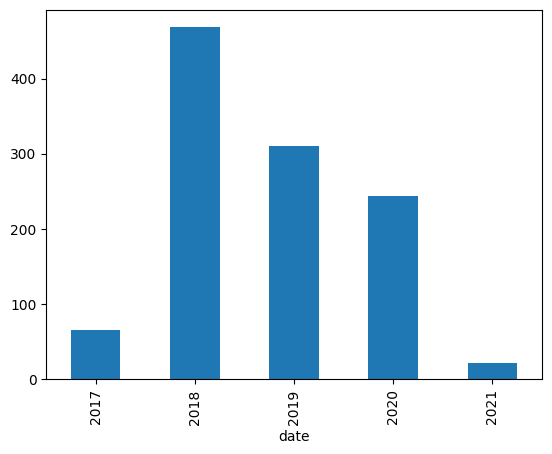

In [17]:
pd_df["date"].groupby(pd_df["date"].dt.year).count().plot(kind="bar")

<Axes: xlabel='date,date'>

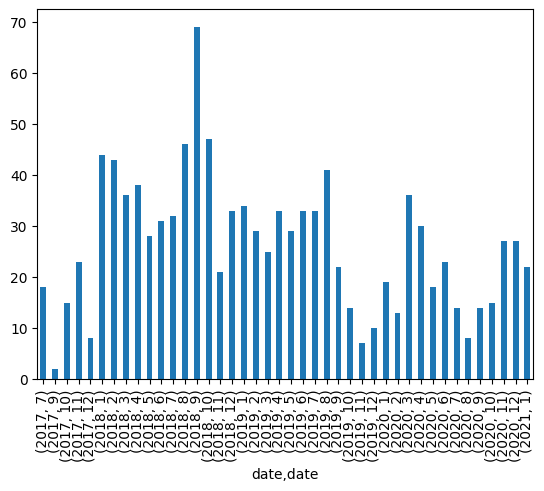

In [18]:
pd_df["date"].groupby([pd_df["date"].dt.year, pd_df["date"].dt.month]).count().plot(kind="bar")

In [19]:
test_df = pd_df[pd_df.symbol == "RDN"].copy(deep=True)
test_df.sort_values(by='date', inplace = True) 
test_df


,symbol,group,date,hour,exchange
255,RDN,BPG,2018-08-21,16:00,binance
257,RDN,BPG,2018-09-04,15:30,binance
485,RDN,MPG,2018-10-28,17:00,binance
265,RDN,BPG,2018-11-27,17:00,binance
743,RDN,BPF,2018-11-27,17:00,binance
767,RDN,BPF,2019-03-24,18:59,bittrex
771,RDN,BPF,2019-04-24,17:00,binance
497,RDN,MPG,2019-04-24,17:00,binance
773,RDN,BPF,2019-05-10,16:00,binance
1006,RDN,CPI,2019-05-10,16:00,binance


In [20]:
test_df['A_dif'] = test_df['date'].diff()
test_df
#test_df = test_df[test_df['A_dif']<15]

,symbol,group,date,hour,exchange,A_dif
255,RDN,BPG,2018-08-21,16:00,binance,NaT
257,RDN,BPG,2018-09-04,15:30,binance,14 days
485,RDN,MPG,2018-10-28,17:00,binance,54 days
265,RDN,BPG,2018-11-27,17:00,binance,30 days
743,RDN,BPF,2018-11-27,17:00,binance,0 days
767,RDN,BPF,2019-03-24,18:59,bittrex,117 days
771,RDN,BPF,2019-04-24,17:00,binance,31 days
497,RDN,MPG,2019-04-24,17:00,binance,0 days
773,RDN,BPF,2019-05-10,16:00,binance,16 days
1006,RDN,CPI,2019-05-10,16:00,binance,0 days


In [21]:
# calculate monthly difference

# remove all symbols that only occure once
pd_df = pd_df[pd_df.groupby('symbol').symbol.transform(len) > 1]

symbols = pd_df.symbol.tolist()
symbols = list(dict.fromkeys(symbols)) 
len(symbols)

dfs = []
for symbol in symbols:
    test_df = pd_df[pd_df.symbol == symbol].copy(deep=True)
    test_df.sort_values(by='date', inplace = True)
    test_df['diff_to_signal_before'] = test_df['date'].diff()
    dfs.append(test_df.copy(deep=True))

print(len(dfs))
final_df = pd.concat(dfs)
final_df

200


,symbol,group,date,hour,exchange,diff_to_signal_before
531,PDC,TCC,2017-07-05,15:00,bittrex,NaT
554,PDC,TCG,2017-12-05,17:18,bittrex,153 days
348,PDC,C4P,2017-12-25,17:15,bittrex,20 days
532,SLR,TCC,2017-07-08,16:30,bittrex,NaT
569,SLR,TCG,2019-06-25,19:00,bittrex,717 days
...,...,...,...,...,...,...
313,PNT,BPS,2020-12-04,23:01,binance,0 days
516,IDEX,MPG,2020-12-31,17:00,binance,NaT
1109,IDEX,CCS,2020-12-31,17:00,binance,0 days
634,IDEX,TWP,2020-12-31,17:00,binance,0 days


<Axes: xlabel='diff_to_signal_before'>

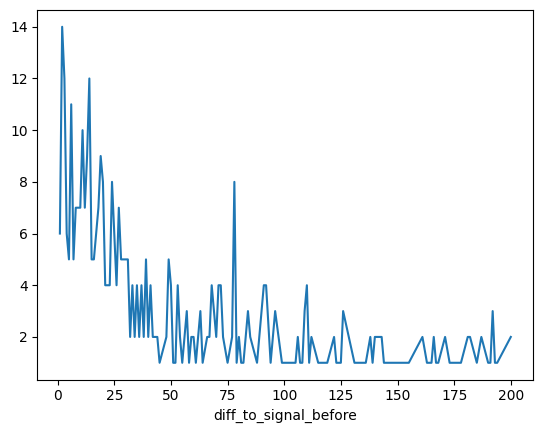

In [22]:
# Distribution of Time
final_df = final_df[final_df["diff_to_signal_before"].dt.days != 0]
final_df = final_df[final_df["diff_to_signal_before"].dt.days < 201]
final_df["diff_to_signal_before"].groupby(final_df["diff_to_signal_before"].dt.days).count().plot(kind="line")

# Groups that often publish together

In [23]:
test_df = pd_df[pd_df.symbol == "RDN"].copy(deep=True)
test_df = test_df.drop(columns= ["exchange"]) 
test_df.head(5)

,symbol,group,date,hour
255,RDN,BPG,2018-08-21,16:00
257,RDN,BPG,2018-09-04,15:30
485,RDN,MPG,2018-10-28,17:00
265,RDN,BPG,2018-11-27,17:00
743,RDN,BPF,2018-11-27,17:00


In [24]:
import pandas as pd

# create a dataframe with the provided data
data = {'symbol': ['RDN', 'RDN', 'RDN', 'RDN', 'RDN'], 
        'group': ['BPG', 'BPG', 'MPG', 'BPG', 'BPF'], 
        'date': ['2018-08-21', '2018-09-04', '2018-10-28', '2018-11-27', '2018-11-27'], 
        'hour': ['16:00', '15:30', '17:00', '17:00', '17:00']}

df = pd.DataFrame(data)

# group the dataframe by the 'symbol', 'date', and 'hour' columns
grouped = df.groupby(['symbol', 'date', 'hour'])

# iterate over each group and print the group's information
for group_name, group_df in grouped:
    #print(group_name)
    #print(group_df)
    #print(type(group_df))
    if len(group_df.index) > 1:
        print(group_df)
        print(type(group_df))
        


group_sizes = grouped.size()
#print(group_sizes)

for x in group_sizes:
    if x > 1:
        print("JO")
        #print(x)

  symbol group        date   hour
3    RDN   BPG  2018-11-27  17:00
4    RDN   BPF  2018-11-27  17:00
<class 'pandas.core.frame.DataFrame'>
JO


In [25]:
import pandas as pd

# create a dataframe with the provided data
data = {'symbol': ['RDN', 'RDN', 'RDN', 'RDN', 'RDN'], 
        'group': ['BPG', 'BPG', 'MPG', 'BPG', 'BPF'], 
        'date': ['2018-08-21', '2018-09-04', '2018-10-28', '2018-11-27', '2018-11-27'], 
        'hour': ['16:00', '15:30', '17:00', '17:00', '17:00']}

df = pd.DataFrame(data)

# group the dataframe by the 'symbol', 'date', and 'hour' columns
grouped = pd_df.groupby(['symbol', 'date', 'hour'])

# count the frequency of each 'group' value within each group
group_counts = grouped['group'].apply(lambda x: x.value_counts())

# print the group counts
print(group_counts)

symbol  date        hour      
611     2018-08-31  18:30  BPF    1
                    18:31  LUX    1
        2018-09-07  19:00  BPF    1
8BIT    2018-01-23  17:30  ATW    1
        2018-01-29  17:30  ATW    1
                                 ..
YOYOW   2020-11-01  18:00  CPS    1
                           TWP    1
                           BPF    1
ZSE     2018-05-16  18:00  BPF    1
        2018-06-03  18:00  BPF    1
Name: group, Length: 938, dtype: int64


In [26]:
test_df = pd_df[pd_df.symbol == "RDN"].copy(deep=True)
test_df.sort_values(by='date', inplace = True) 
test_df

# Alle Events von BPG
test_df = test_df.drop(columns= ["exchange"]) 
test_df = test_df.groupby(["symbol", "date", "hour", "group"]).count()
display(test_df)
#print(test_df)

for k, gp in test_df:
    print("H")
    print('key=' + str(k))
    print(gp)

Empty DataFrame
Columns: []
Index: [(RDN, 2018-08-21 00:00:00, 16:00, BPG), (RDN, 2018-09-04 00:00:00, 15:30, BPG), (RDN, 2018-10-28 00:00:00, 17:00, MPG), (RDN, 2018-11-27 00:00:00, 17:00, BPF), (RDN, 2018-11-27 00:00:00, 17:00, BPG), (RDN, 2019-03-24 00:00:00, 18:59, BPF), (RDN, 2019-04-24 00:00:00, 17:00, BPF), (RDN, 2019-04-24 00:00:00, 17:00, MPG), (RDN, 2019-05-10 00:00:00, 15:59, BPG), (RDN, 2019-05-10 00:00:00, 16:00, BPF), (RDN, 2019-05-10 00:00:00, 16:00, CPI), (RDN, 2019-07-29 00:00:00, 15:00, BPF), (RDN, 2019-07-29 00:00:00, 15:00, BPG), (RDN, 2020-02-01 00:00:00, 13:00, BPF), (RDN, 2020-02-01 00:00:00, 13:00, CW), (RDN, 2020-03-13 00:00:00, 16:00, CCS), (RDN, 2020-03-13 00:00:00, 16:00, TCG), (RDN, 2020-08-25 00:00:00, 18:00, BPF), (RDN, 2020-08-25 00:00:00, 18:00, CPS), (RDN, 2020-08-25 00:00:00, 18:01, CPI), (RDN, 2020-10-17 00:00:00, 16:00, BPF), (RDN, 2020-10-17 00:00:00, 16:00, CPI), (RDN, 2020-10-17 00:00:00, 16:00, CPS), (RDN, 2020-10-17 00:00:00, 16:00, TCG)]

In [27]:
from functools import reduce

test_df = pd_df[pd_df.symbol == "RDN"].copy(deep=True)
display(test_df)
#test_df["date"] = test_df["date"].astype("datetime64")

groups = list()
for g, data in test_df.groupby(['symbol', 'date', 'hour']):
    # print(g, data)
    groups.append(g)

print(groups)
print(groups[0])

from collections import Counter
cnt = Counter(groups)
print(cnt)

,symbol,group,date,hour,exchange
255,RDN,BPG,2018-08-21,16:00,binance
257,RDN,BPG,2018-09-04,15:30,binance
485,RDN,MPG,2018-10-28,17:00,binance
265,RDN,BPG,2018-11-27,17:00,binance
743,RDN,BPF,2018-11-27,17:00,binance
767,RDN,BPF,2019-03-24,18:59,bittrex
771,RDN,BPF,2019-04-24,17:00,binance
497,RDN,MPG,2019-04-24,17:00,binance
773,RDN,BPF,2019-05-10,16:00,binance
1006,RDN,CPI,2019-05-10,16:00,binance


[('RDN', Timestamp('2018-08-21 00:00:00'), '16:00'), ('RDN', Timestamp('2018-09-04 00:00:00'), '15:30'), ('RDN', Timestamp('2018-10-28 00:00:00'), '17:00'), ('RDN', Timestamp('2018-11-27 00:00:00'), '17:00'), ('RDN', Timestamp('2019-03-24 00:00:00'), '18:59'), ('RDN', Timestamp('2019-04-24 00:00:00'), '17:00'), ('RDN', Timestamp('2019-05-10 00:00:00'), '15:59'), ('RDN', Timestamp('2019-05-10 00:00:00'), '16:00'), ('RDN', Timestamp('2019-07-29 00:00:00'), '15:00'), ('RDN', Timestamp('2020-02-01 00:00:00'), '13:00'), ('RDN', Timestamp('2020-03-13 00:00:00'), '16:00'), ('RDN', Timestamp('2020-08-25 00:00:00'), '18:00'), ('RDN', Timestamp('2020-08-25 00:00:00'), '18:01'), ('RDN', Timestamp('2020-10-17 00:00:00'), '16:00')]
('RDN', Timestamp('2018-08-21 00:00:00'), '16:00')
Counter({('RDN', Timestamp('2018-08-21 00:00:00'), '16:00'): 1, ('RDN', Timestamp('2018-09-04 00:00:00'), '15:30'): 1, ('RDN', Timestamp('2018-10-28 00:00:00'), '17:00'): 1, ('RDN', Timestamp('2018-11-27 00:00:00'), '17:

In [28]:
import pandas as pd

# create a dataframe with the provided data
data = {'symbol': ['RDN', 'RDN', 'RDN', 'RDN', 'RDN'], 
        'group': ['BPG', 'BPG', 'MPG', 'BPG', 'BPF'], 
        'date': ['2018-08-21', '2018-09-04', '2018-10-28', '2018-11-27', '2018-11-27'], 
        'hour': ['16:00', '15:30', '17:00', '17:00', '17:00']}

df = pd.DataFrame(data)

# group the dataframe by 'symbol', 'date', and 'hour'
grouped = df.groupby(['symbol', 'date', 'hour'])

# count the frequency of each value in the 'group' column within each group
group_counts = grouped['group'].value_counts()

# extract the values for rows with 'BPG' as the 'group' value
bpg_counts = group_counts.loc[(slice(None), slice(None), slice(None), 'BPG')]

# extract the values for all other 'group' values in the same groups as the 'BPG' rows
other_counts = group_counts.loc[(slice(None), slice(None), slice(None), slice(None)), ~group_counts.index.isin(bpg_counts.index)]

# print the results
print("Frequency of 'BPG' rows:")
print(bpg_counts)
print("\nFrequency of other 'group' values in the same groups:")
print(other_counts)

IndexingError: Too many indexers

In [29]:
import pandas as pd

# create a dictionary with the column names and a list of zeros for each column
data = {'TCC': [0] * 13,
        'TCG': [0] * 13,
        'BPS': [0] * 13,
        'BPG': [0] * 13,
        'BPF': [0] * 13,
        'MPG': [0] * 13,
        'C4P': [0] * 13,
        'PKG': [0] * 13,
        'ATW': [0] * 13,
        'LUX': [0] * 13,
        'CPS': [0] * 13,
        'CPI': [0] * 13,
        'CCB': [0] * 13,
        'FCS': [0] * 13,
        'WCG': [0] * 13}

# create a pandas DataFrame with the dictionary and set the index to the column names
my_df = pd.DataFrame(data, index=['TCC','C4P','PKG','TCG','ATW','BPS','FCS','BPF','LUX','CPI','WCG','BPG','CPS','CCB','SE','MPG','CCS','CW','TWP','CP'])

# print the resulting DataFrame
print(my_df)

ValueError: Length of values (13) does not match length of index (20)

In [ ]:
import pandas as pd

index_list = ['TCC','C4P','PKG','TCG','ATW','BPS','FCS','BPF','LUX','CPI','WCG','BPG','CPS','CCB','SE','MPG','CCS','CW','TWP','CP']

my_df = pd.DataFrame(0, index=index_list, columns=index_list)
my_df

,TCC,C4P,PKG,TCG,ATW,BPS,FCS,BPF,LUX,CPI,WCG,BPG,CPS,CCB,SE,MPG,CCS,CW,TWP,CP
TCC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PKG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FCS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LUX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CPI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

# create a dataframe with the provided data
data = {'symbol': ['RDN', 'RDN', 'RDN', 'RDN', 'RDN'], 
        'group': ['BPG', 'BPG', 'MPG', 'BPG', 'BPF'], 
        'date': ['2018-08-21', '2018-09-04', '2018-10-28', '2018-11-27', '2018-11-27'], 
        'hour': ['16:00', '15:30', '17:00', '17:00', '17:00']}

df = pd.DataFrame(data)

# group the dataframe by the 'symbol', 'date', and 'hour' columns
grouped = df.groupby(['symbol', 'date', 'hour'])

# iterate over each group and print the group's information
for group_name, group_df in grouped:
    #print(group_name)
    #print(group_df)
    #print(type(group_df))
    bla = list(group_df.group)
    print(bla)
    if len(bla) == 1:
        #print(group_df)
        #print(type(group_df))
        my_df.at[bla[0],bla[0]] = my_df.at[bla[0],bla[0]] + 1
    else:
        pass        


group_sizes = grouped.size()
#print(group_sizes)

for x in group_sizes:
    if x > 1:
        print("JO")
        #print(x)

display(my_df)

['BPG']
['BPG']
['MPG']
['BPG', 'BPF']
JO


,TCC,C4P,PKG,TCG,ATW,BPS,FCS,BPF,LUX,CPI,WCG,BPG,CPS,CCB,SE,MPG,CCS,CW,TWP,CP
TCC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PKG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FCS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LUX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CPI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
